In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.preprocessing import StandardScaler

In [2]:
fraud=pd.read_csv("C:\\Users\\HP\\Desktop\\ExcelR\\Assignment\\Assignment 11 Decision Tree\\Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [5]:
fraud.rename({'Undergrad':'UG','Marital.Status':'MS', 'Taxable.Income':'TI', 'City.Population':'CP', 'Work.Experience':'WE'},axis = 1, inplace = True)

In [6]:
fraud.head()

,UG,MS,TI,CP,WE,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [7]:
# Categorizing the tax column based on the condition

fraud['TI'] = fraud.TI.map(lambda taxable_income : 'Risky' if taxable_income <= 30000 else 'Good')

In [8]:
# Converting the categorical columns to proper datatypes

fraud['UG'] = fraud['UG'].astype("category")
fraud['MS'] = fraud['MS'].astype("category")
fraud['Urban'] = fraud['Urban'].astype("category")
fraud['TI'] = fraud['TI'].astype("category")

In [9]:
fraud.dtypes

UG       category
MS       category
TI       category
CP          int64
WE          int64
Urban    category
dtype: object

In [10]:
# Encoding the categorical columns by using label encoder

label_encoder = preprocessing.LabelEncoder()
fraud['UG'] = label_encoder.fit_transform(fraud['UG'])

fraud['MS'] = label_encoder.fit_transform(fraud['MS'])

fraud['Urban'] = label_encoder.fit_transform(fraud['Urban'])

fraud['TI'] = label_encoder.fit_transform(fraud['TI'])

In [11]:
fraud.head()

,UG,MS,TI,CP,WE,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


In [12]:
fraud['TI'].unique()

array([0, 1])

In [13]:
fraud['TI'].value_counts()

0    476
1    124
Name: TI, dtype: int64

In [14]:
# Splitting the data into x and y as input and output

X = fraud.iloc[:,[0,1,3,4,5]]
Y = fraud.iloc[:,2]

In [15]:
X

,UG,MS,CP,WE,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [16]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: TI, Length: 600, dtype: int32

In [17]:
# Splitting the data into training and test dataset

x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.3, random_state = 10)

In [18]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, class_weight = 'balanced') #model build by C5.0
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3)

[Text(181.35000000000002, 190.26, 'X[3] <= 21.5\nentropy = 1.0\nsamples = 420\nvalue = [210.0, 210.0]'),
 Text(111.60000000000001, 135.9, 'X[3] <= 18.5\nentropy = 0.997\nsamples = 289\nvalue = [141.036, 158.78]'),
 Text(55.800000000000004, 81.53999999999999, 'X[2] <= 26849.0\nentropy = 1.0\nsamples = 252\nvalue = [125.503, 128.049]'),
 Text(27.900000000000002, 27.180000000000007, 'entropy = 0.0\nsamples = 1\nvalue = [0.0, 2.561]'),
 Text(83.7, 27.180000000000007, 'entropy = 1.0\nsamples = 251\nvalue = [125.503, 125.488]'),
 Text(167.4, 81.53999999999999, 'X[2] <= 176873.0\nentropy = 0.921\nsamples = 37\nvalue = [15.533, 30.732]'),
 Text(139.5, 27.180000000000007, 'entropy = 0.866\nsamples = 32\nvalue = [12.426, 30.732]'),
 Text(195.3, 27.180000000000007, 'entropy = -0.0\nsamples = 5\nvalue = [3.107, 0.0]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 44828.0\nentropy = 0.984\nsamples = 131\nvalue = [68.964, 51.22]'),
 Text(223.20000000000002, 81.53999999999999, 'entropy = 0.0\nsamples = 

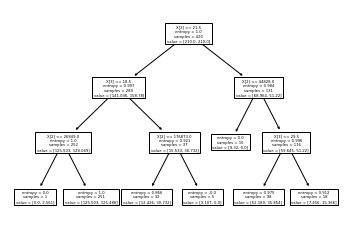

In [19]:
tree.plot_tree(model)

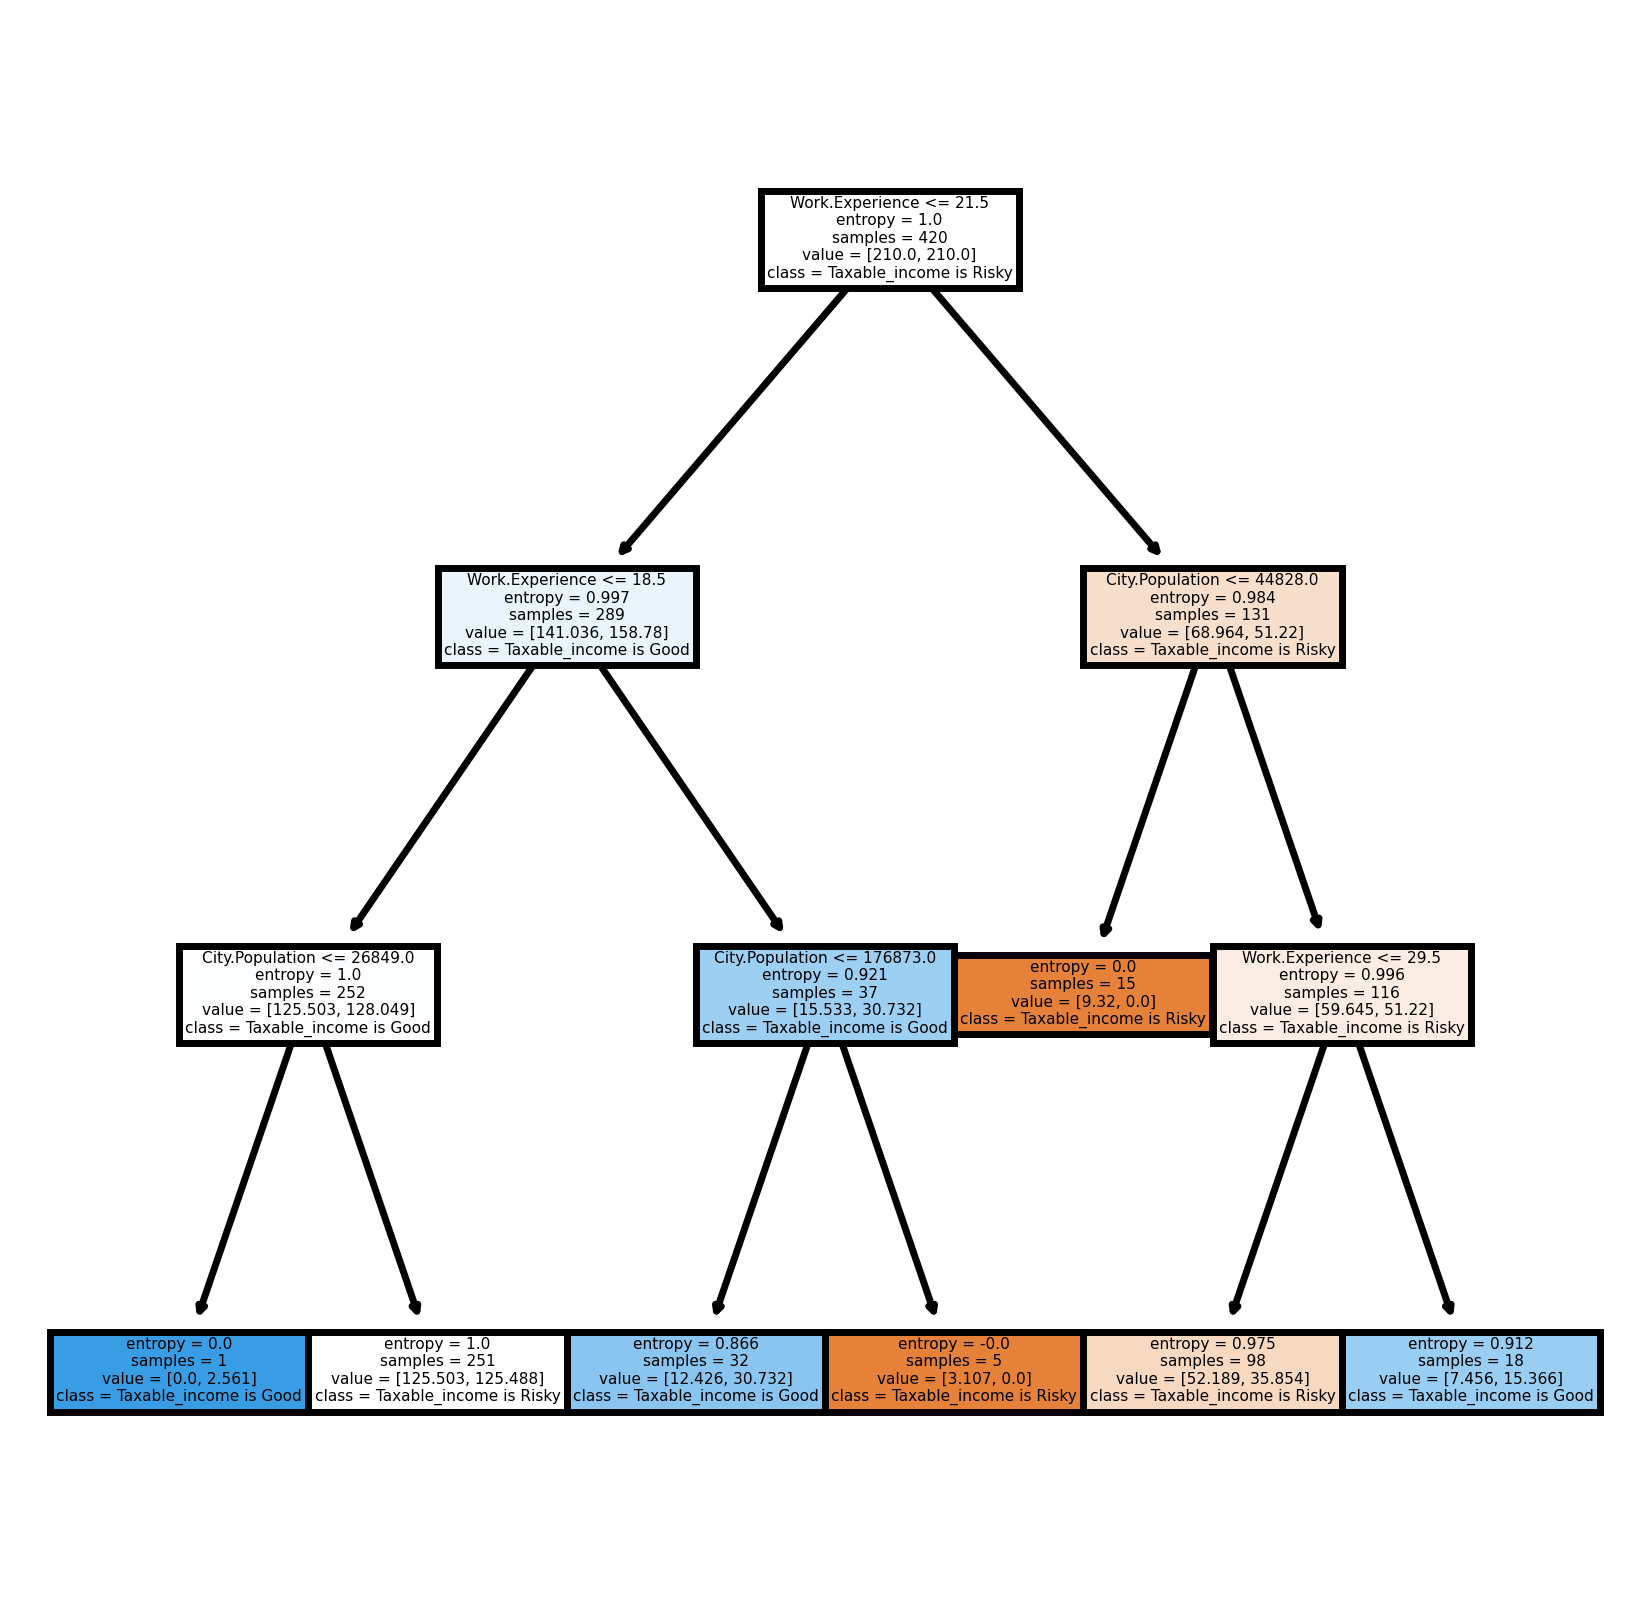

In [20]:
fn = ['Undergrad',	'Marital.Status',	'City.Population',	'Work.Experience',	'Urban']
cn = ['Taxable_income is Risky', 'Taxable_income is Good']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 500)   
tree.plot_tree(model, feature_names = fn, class_names = cn, filled = True);

In [21]:
preds = model.predict(x_test)
preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0])

In [22]:
pd.Series(preds).value_counts()

0    157
1     23
dtype: int64

In [23]:
crosstable = pd.crosstab(preds,y_test)
crosstable

TI,0,1
row_0,,
0,121,36
1,17,6


In [24]:
np.mean(preds==y_test)

0.7055555555555556

In [25]:
print(classification_report(preds,y_test))

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       157
           1       0.14      0.26      0.18        23

    accuracy                           0.71       180
   macro avg       0.51      0.52      0.50       180
weighted avg       0.78      0.71      0.74       180



In [26]:
print("Accuracy C5: ", accuracy_score(y_test,preds)*100 )

Accuracy :  70.55555555555556


In [27]:
model_cart = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, class_weight = 'balanced') #build model by CART
model_cart.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3)

[Text(167.4, 190.26, 'X[3] <= 21.5\ngini = 0.5\nsamples = 420\nvalue = [210.0, 210.0]'),
 Text(83.7, 135.9, 'X[3] <= 18.5\ngini = 0.498\nsamples = 289\nvalue = [141.036, 158.78]'),
 Text(41.85, 81.53999999999999, 'X[3] <= 11.5\ngini = 0.5\nsamples = 252\nvalue = [125.503, 128.049]'),
 Text(20.925, 27.180000000000007, 'gini = 0.495\nsamples = 149\nvalue = [71.45, 87.073]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.491\nsamples = 103\nvalue = [54.053, 40.976]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 176873.0\ngini = 0.446\nsamples = 37\nvalue = [15.533, 30.732]'),
 Text(104.625, 27.180000000000007, 'gini = 0.41\nsamples = 32\nvalue = [12.426, 30.732]'),
 Text(146.475, 27.180000000000007, 'gini = -0.0\nsamples = 5\nvalue = [3.107, 0.0]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 63275.0\ngini = 0.489\nsamples = 131\nvalue = [68.964, 51.22]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 44828.0\ngini = 0.23\nsamples = 28\nvalue = [16.775, 2.561]'),
 Text(188.3

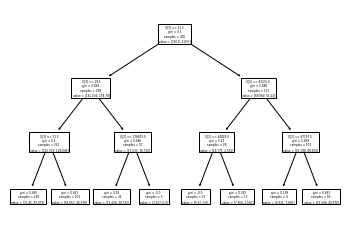

In [28]:
tree.plot_tree(model_cart)

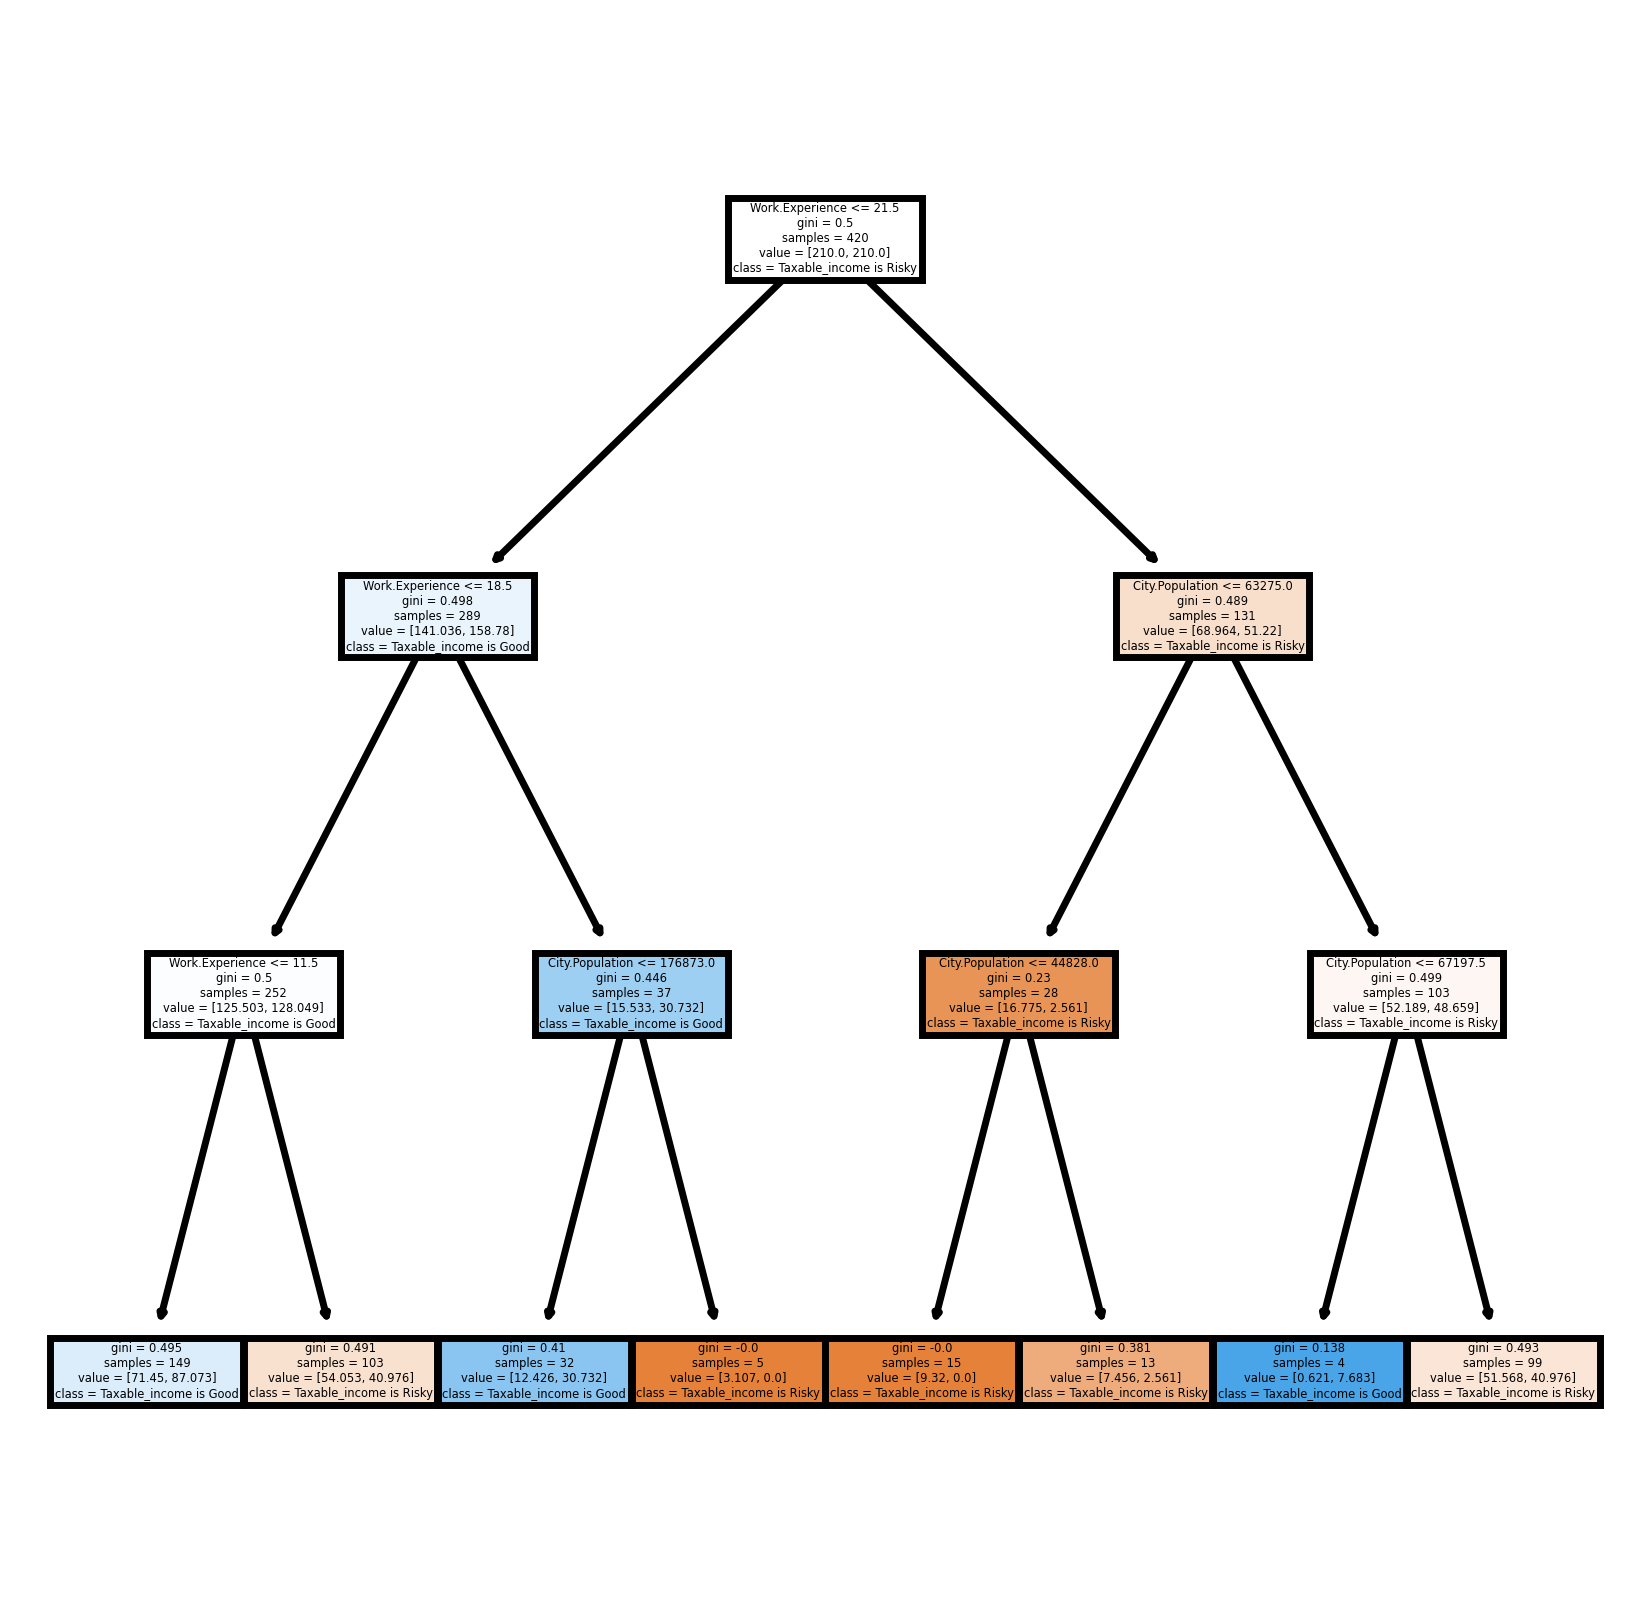

In [29]:
fn = ['Undergrad',	'Marital.Status',	'City.Population',	'Work.Experience',	'Urban']
cn = ['Taxable_income is Risky', 'Taxable_income is Good']
fig,axes = plt.subplots(nrows = 1, ncols =1, figsize =(4,4), dpi = 500)   
tree.plot_tree(model_cart, feature_names = fn, class_names = cn, filled = True);

In [30]:
preds1 = model_cart.predict(x_test)
preds1

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0])

In [31]:
np.mean(preds1==y_test)

0.46111111111111114

In [32]:
from sklearn.metrics import f1_score
print(f1_score(preds1,y_test))

0.2706766917293233


In [33]:
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)

In [34]:
print("Accuracy CART : ", accuracy_score(y_test,preds1)*100 )

Accuracy :  46.111111111111114


In [35]:
from sklearn.ensemble import BaggingClassifier#bagging combines the results of multipls models to get a generalized result. 
from sklearn.ensemble import AdaBoostClassifier #boosting method attempts to correct the errors of previous models.
from sklearn.metrics import accuracy_score#importing metrics for accuracy calculation (confusion matrix)
from sklearn.metrics import classification_report, confusion_matrix


In [36]:
dcmodel =  BaggingClassifier(DecisionTreeClassifier(max_depth = 4), random_state=0) #decision tree classifier object
dcmodel1 =  AdaBoostClassifier(DecisionTreeClassifier(max_depth = 4), random_state=0) #decision tree classifier object

In [37]:
dcmodel = dcmodel.fit(x_train,y_train) #train decision tree
y_predict = dcmodel.predict(x_test)

In [38]:
print("Accuracy Bagging Classifier: ", accuracy_score(y_test,y_predict)*100 )

Accuracy :  76.66666666666667


In [39]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[138   0]
 [ 42   0]]
              precision    recall  f1-score   support

           0       0.77      1.00      0.87       138
           1       0.00      0.00      0.00        42

    accuracy                           0.77       180
   macro avg       0.38      0.50      0.43       180
weighted avg       0.59      0.77      0.67       180



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
dcmodel1 = dcmodel1.fit(x_train,y_train) #train decision tree
y_predict1 = dcmodel1.predict(x_test)

In [41]:
print("Accuracy Adaboost: ", accuracy_score(y_test,y_predict1)*100 )

Accuracy :  64.44444444444444


In [42]:
print(confusion_matrix(y_test,y_predict1))
print(classification_report(y_test,y_predict1))

[[112  26]
 [ 38   4]]
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       138
           1       0.13      0.10      0.11        42

    accuracy                           0.64       180
   macro avg       0.44      0.45      0.44       180
weighted avg       0.60      0.64      0.62       180



In [47]:
print("Accuracy C5: ", round(accuracy_score(y_test,preds)*100 ))
print("Accuracy CART: ", round(accuracy_score(y_test,preds1)*100 ))
print("Accuracy Bagging Classifier : ", round(accuracy_score(y_test,y_predict)*100 ))
print("Accuracy Adaboost : ", round(accuracy_score(y_test,y_predict1)*100 ))

Accuracy C5:  71
Accuracy CART:  46
Accuracy Bagging Classifier :  77
Accuracy Adaboost :  64
